# Feature Engineering

In [1]:
# Test which scaling & transforming to use

In [52]:
# ----------------------------------
# IMPORTS
#-----------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler, StandardScaler, PowerTransformer, QuantileTransformer

In [66]:
df = pd.read_csv("../00_data/1_interim/knnimputed.csv")
df_features = df.drop(columns=["child_mortality_igme"])

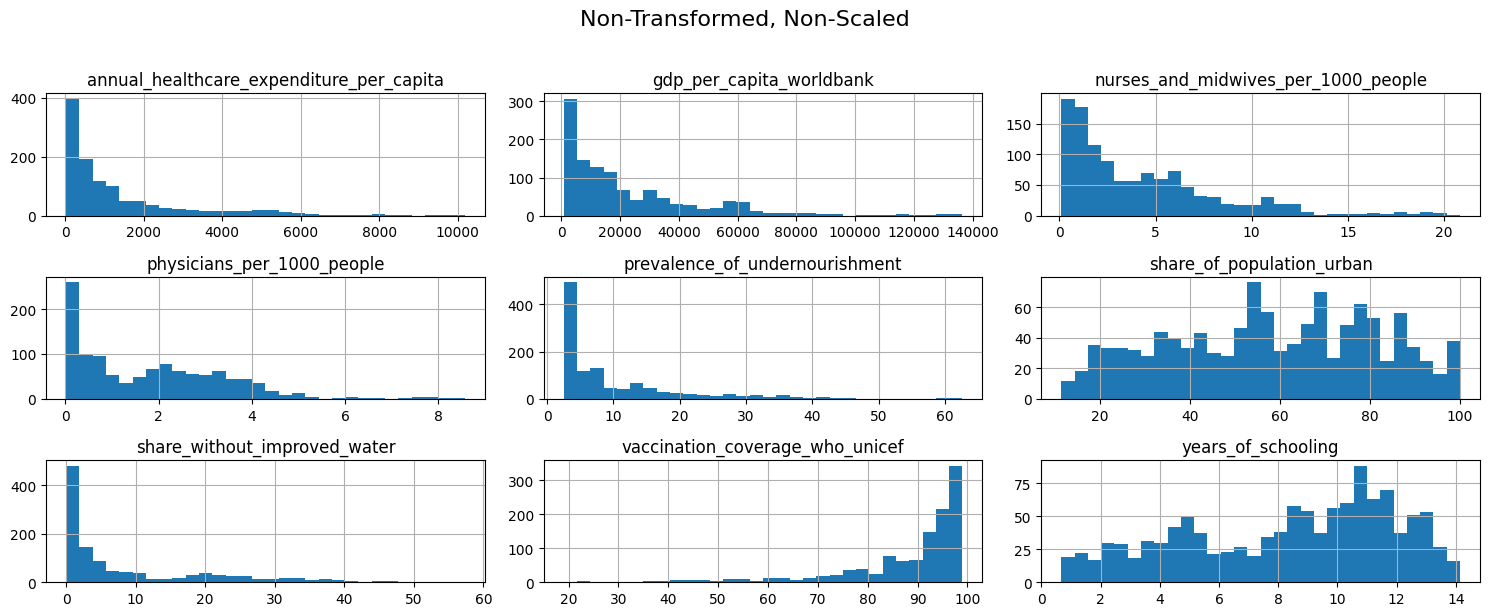

In [67]:
# ----------------------------------
# ORIGINAL DISTRIBUTIONS
#-----------------------------------
df_features.hist(bins=30, figsize=(15, 6))
plt.suptitle("Non-Transformed, Non-Scaled", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

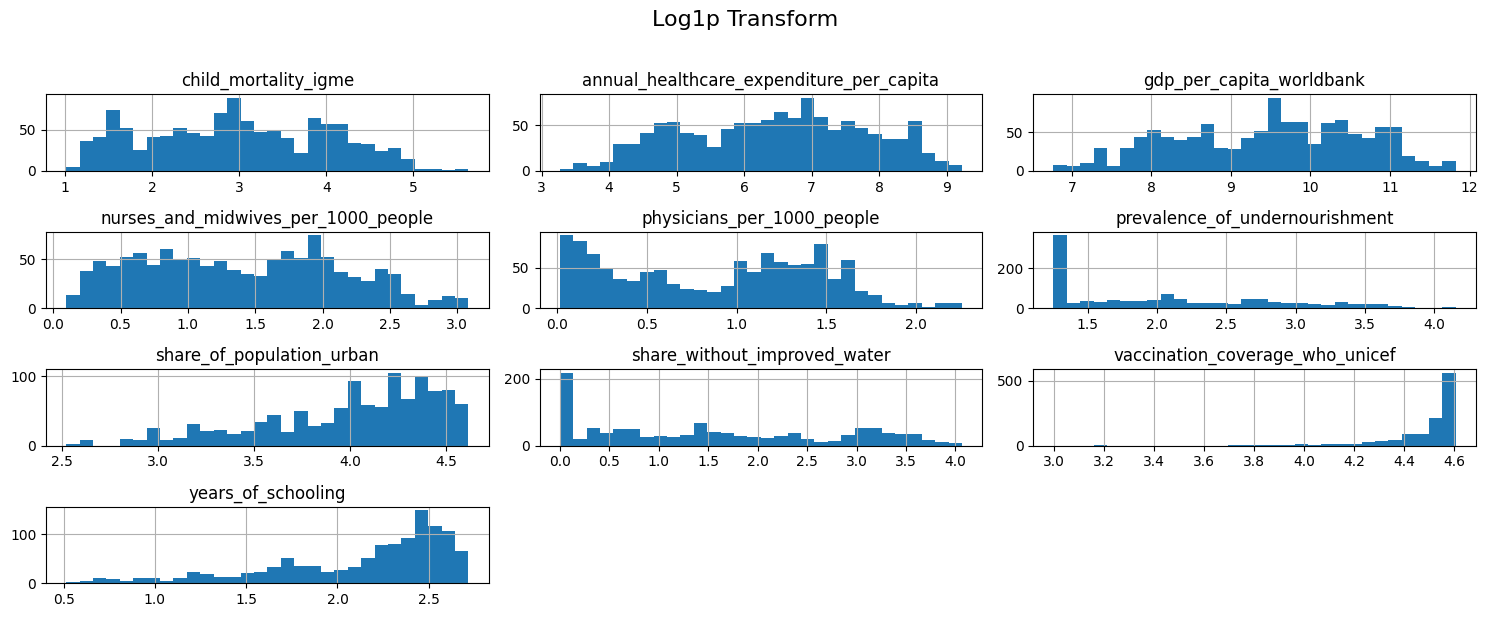

In [71]:
# ----------------------------------
# only log1p 
#-----------------------------------
df_test0 = df.copy()

log_df = np.log1p(df_test0)

df_transformed0 = pd.DataFrame(
    log_df,
    columns=df_test0.columns
)

df_transformed0.hist(bins=30, figsize=(15, 6))
plt.suptitle("Log1p Transform", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

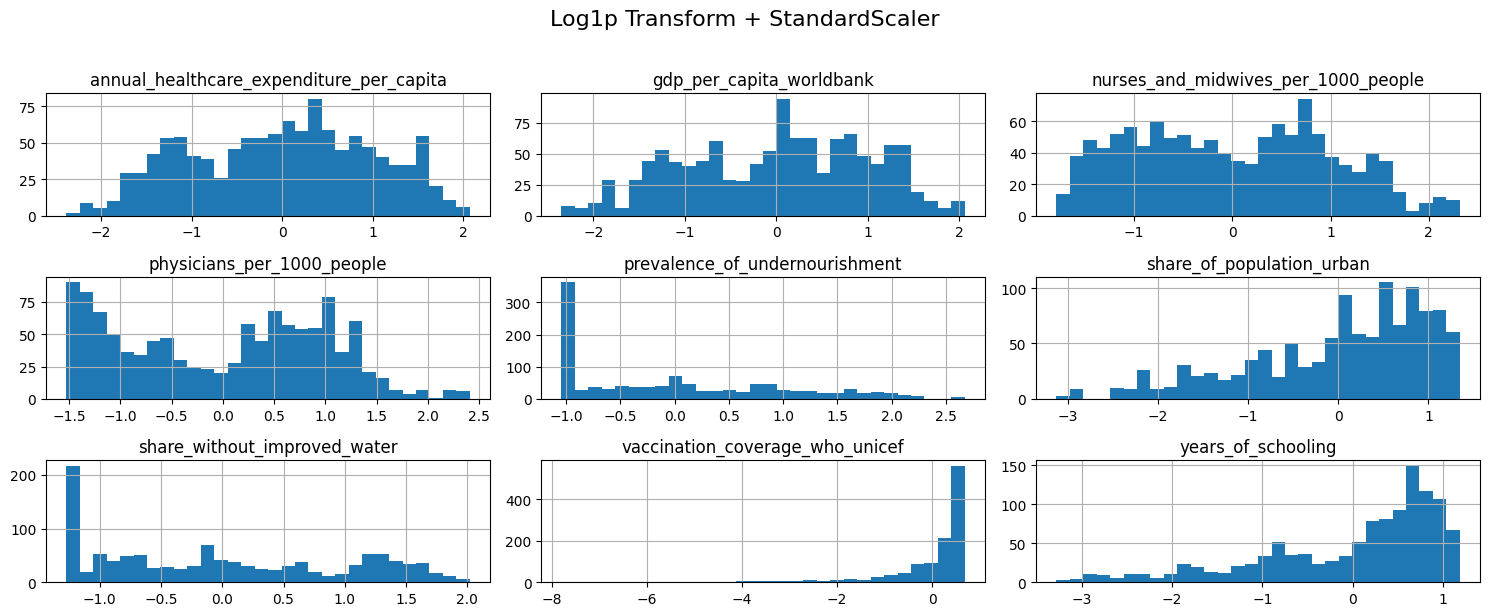

In [68]:
# ----------------------------------
# log1p + StandardScaler
#-----------------------------------
df_test1 = df_features.copy()

log_transform_df_test1 = np.log1p(df_test1)

scaler1 = StandardScaler()
scale_data1 = scaler1.fit_transform(log_transform_df_test1)

df_transformed1 = pd.DataFrame(
    scale_data1,
    columns=df_test1.columns
)

df_transformed1.hist(bins=30, figsize=(15, 6))
plt.suptitle("Log1p Transform + StandardScaler", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

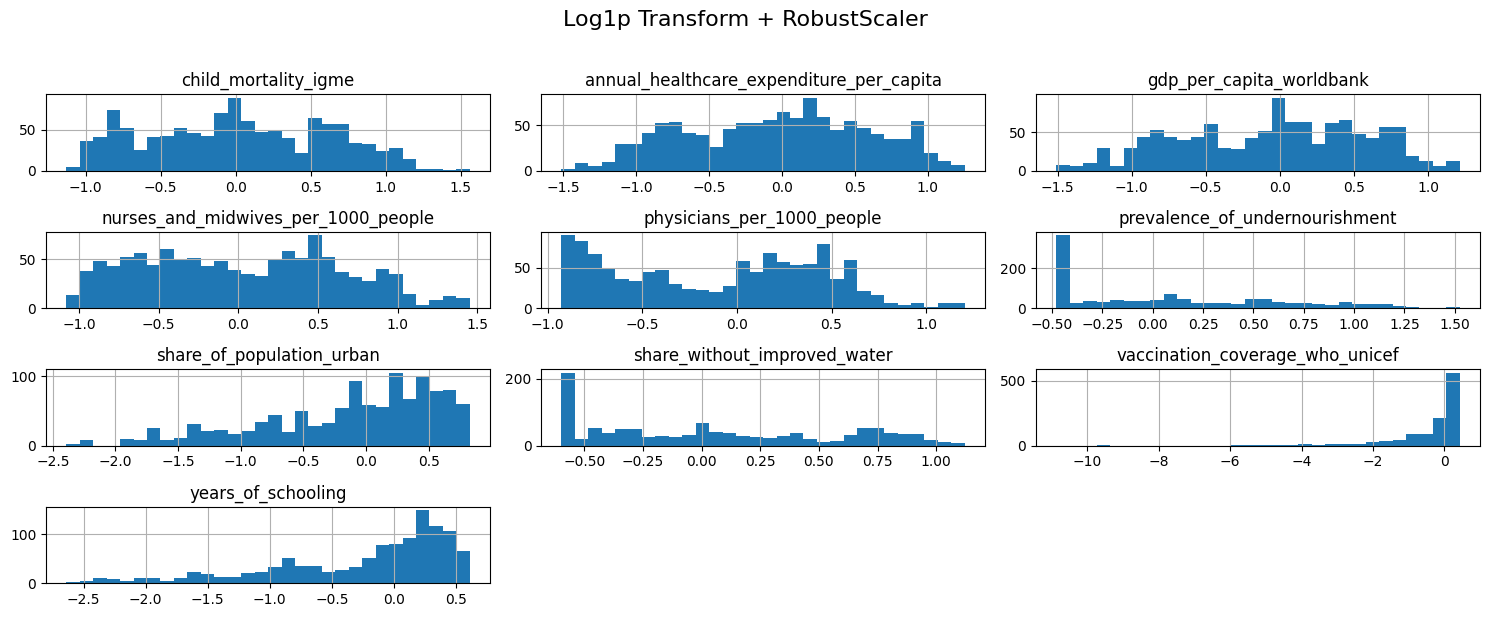

In [65]:
# ----------------------------------
# log1p + RobustScaler
#-----------------------------------
df_test2 = df_features.copy()

log_transform_df_test2 = np.log1p(df_test2)

scaler2 = RobustScaler()
scale_data2 = scaler2.fit_transform(log_transform_df_test2)

df_transformed2 = pd.DataFrame(
    scale_data2,
    columns=df_test2.columns
)

df_transformed2.hist(bins=30, figsize=(15, 6))
plt.suptitle("Log1p Transform + RobustScaler", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

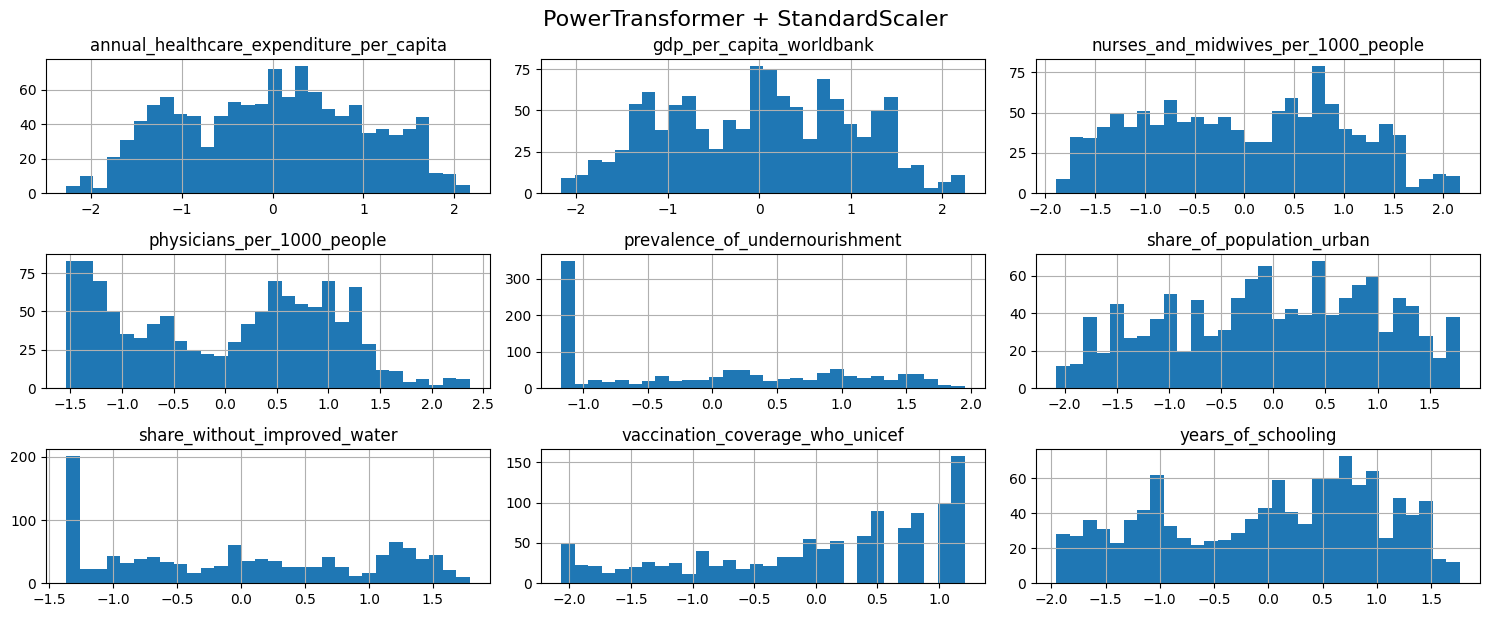

In [48]:
# ----------------------------------
# PowerTransformer + StandardScaler
#-----------------------------------
df_test3 = df_features.copy()

power_transform_df_test3 = PowerTransformer() #uses StandardScaler intern default
df_test3_transformed = power_transform_df_test3.fit_transform(df_test3)

#scaler3 = StandardScaler()
#scale_data3 = scaler3.fit_transform(df_test3_transformed)

df_transformed3 = pd.DataFrame(
    df_test3_transformed,
    columns=df_test3.columns
)

df_transformed3.hist(bins=30, figsize=(15, 6))
plt.tight_layout()
plt.suptitle("PowerTransformer + StandardScaler", fontsize=16, y=1.02)
plt.show()

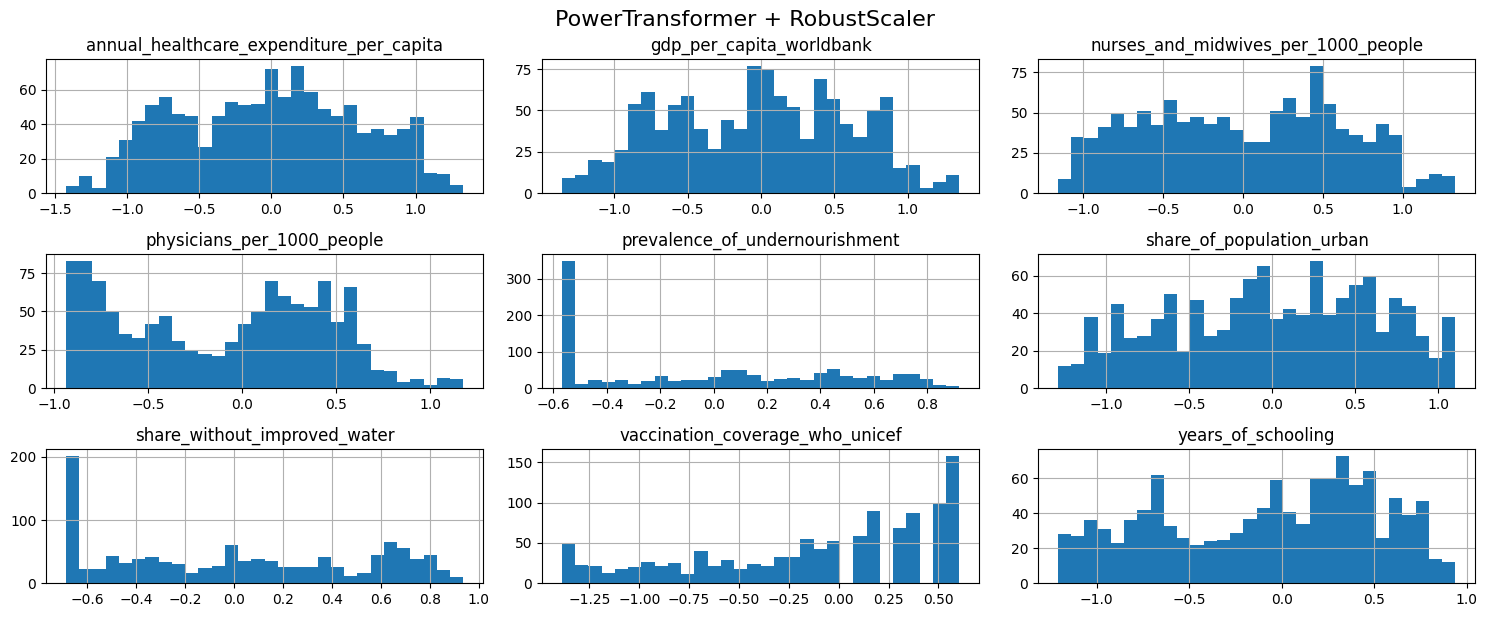

In [47]:
# ----------------------------------
# PowerTransformer + RobustSclaer
#-----------------------------------
df_test4 = df_features.copy()

power_transform_df_test4 = PowerTransformer() 
df_test4_transformed = power_transform_df_test4.fit_transform(df_test4)

scaler4 = RobustScaler()
scale_data4 = scaler4.fit_transform(df_test4_transformed)

df_transformed4 = pd.DataFrame(
    scale_data4,
    columns=df_test4.columns
)

df_transformed4.hist(bins=30, figsize=(15, 6))
plt.tight_layout()
plt.suptitle("PowerTransformer + RobustScaler", fontsize=16, y=1.02)
plt.show()

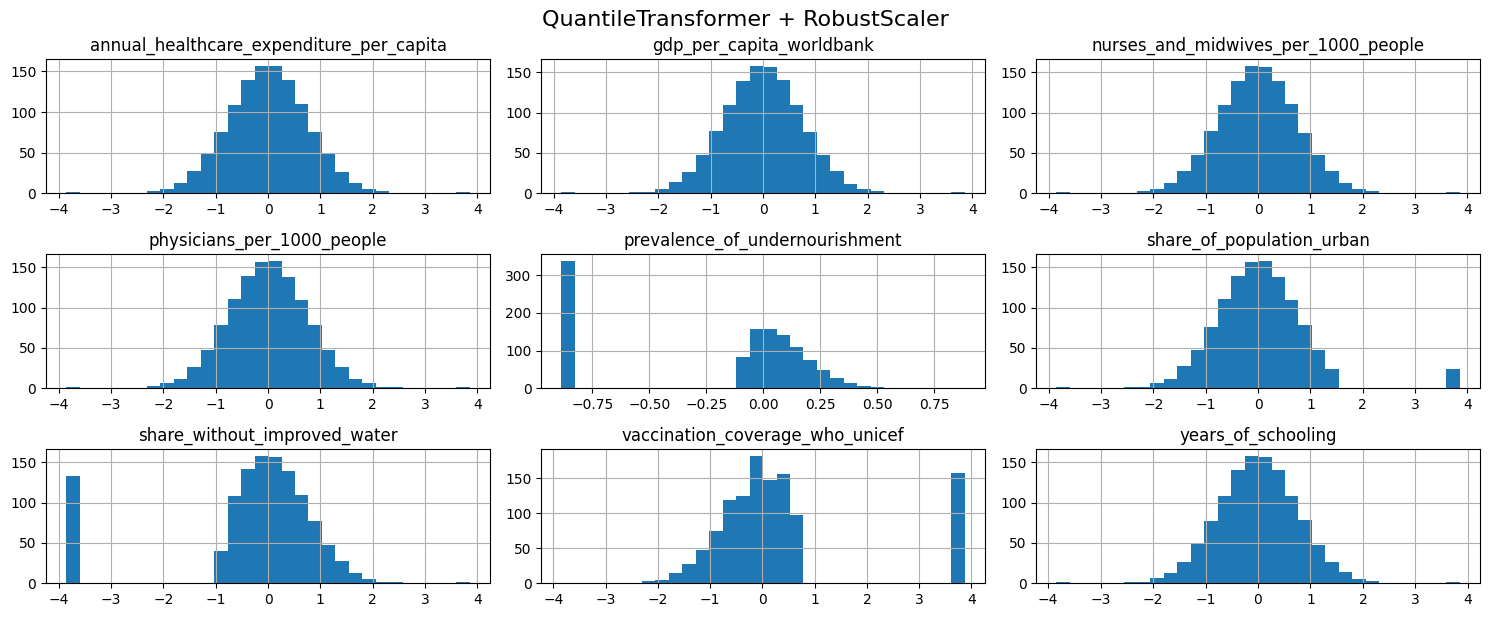

In [57]:
# ----------------------------------
# QuantileTransformer + RobustSclaer
#-----------------------------------
df_test5 = df_features.copy()

quantile_transform_df_test5 = QuantileTransformer(output_distribution="normal", n_quantiles=500) 
df_test5_transformed = quantile_transform_df_test5.fit_transform(df_test5)

scaler5 = RobustScaler()
scale_data5 = scaler5.fit_transform(df_test5_transformed)

df_transformed5 = pd.DataFrame(
    scale_data5,
    columns=df_test5.columns
)

df_transformed5.hist(bins=30, figsize=(15, 6))
plt.tight_layout()
plt.suptitle("QuantileTransformer + RobustScaler", fontsize=16, y=1.02)
plt.show()